In [2]:
##Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Set plot styles
sns.set_style("darkgrid")


In [3]:
#Data has no collumn names
column_names = [
    'engine_id', 'cycle', 'setting1', 'setting2', 'setting3', 
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 
    's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19',
    's20', 's21', 's22', 's23'
]

#Load training data
train_df = pd.read_csv('CMAPPS Data/train_FD001.txt', sep=' ', header=None, names=column_names)

train_df.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [4]:
##Last two clmns are empty, drop them
train_df.drop(columns=['s22', 's23'], inplace=True)

In [5]:
train_df.head()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train_df.tail()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


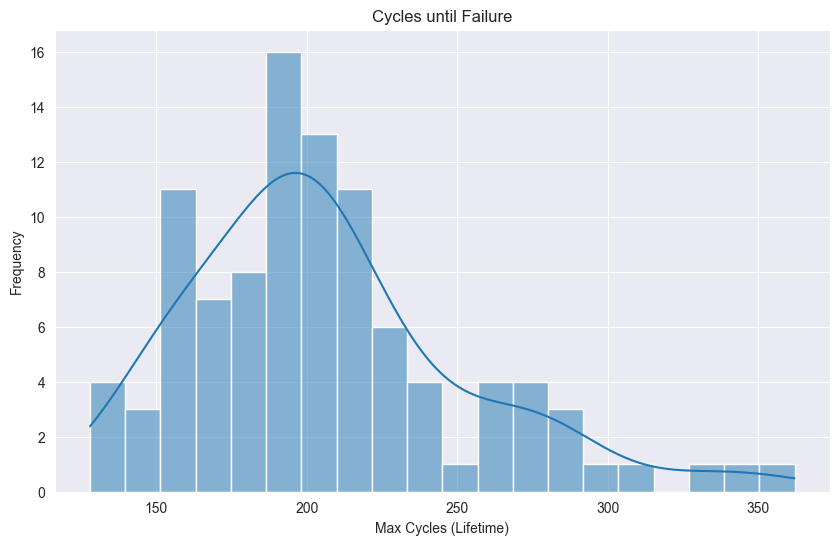

In [7]:
#Graph of engine lifetimes
engine_lifetimes = train_df.groupby('engine_id')['cycle'].max()
plt.figure(figsize=(10,6))
sns.histplot(engine_lifetimes, bins=20, kde=True)
plt.title('Cycles until Failure')
plt.xlabel('Max Cycles (Lifetime)')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Stats
train_df.describe()

,engine_id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,...,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:
sensor_std = train_df.loc[:, 's1':'s21'].std()
print(sensor_std)

s1     0.000000e+00
s2     5.000533e-01
s3     6.131150e+00
s4     9.000605e+00
s5     5.329200e-15
s6     1.388985e-03
s7     8.850923e-01
s8     7.098548e-02
s9     2.208288e+01
s10    0.000000e+00
s11    2.670874e-01
s12    7.375534e-01
s13    7.191892e-02
s14    1.907618e+01
s15    3.750504e-02
s16    3.469531e-18
s17    1.548763e+00
s18    0.000000e+00
s19    0.000000e+00
s20    1.807464e-01
s21    1.082509e-01
dtype: float64


In [10]:
#Remove useless data (clmns with zero variance)
drop_cols = ['setting3', 's1', 's10', 's18', 's19']
train_df.drop(columns=drop_cols, inplace=True)

In [11]:
train_df.describe()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s5,s6,s7,...,s9,s11,s12,s13,s14,s15,s16,s17,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,...,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.500053,6.131150,9.000605,5.329200e-15,0.001389,0.885092,...,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,...,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,...,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,...,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,...,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,...,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,39.430000,23.618400


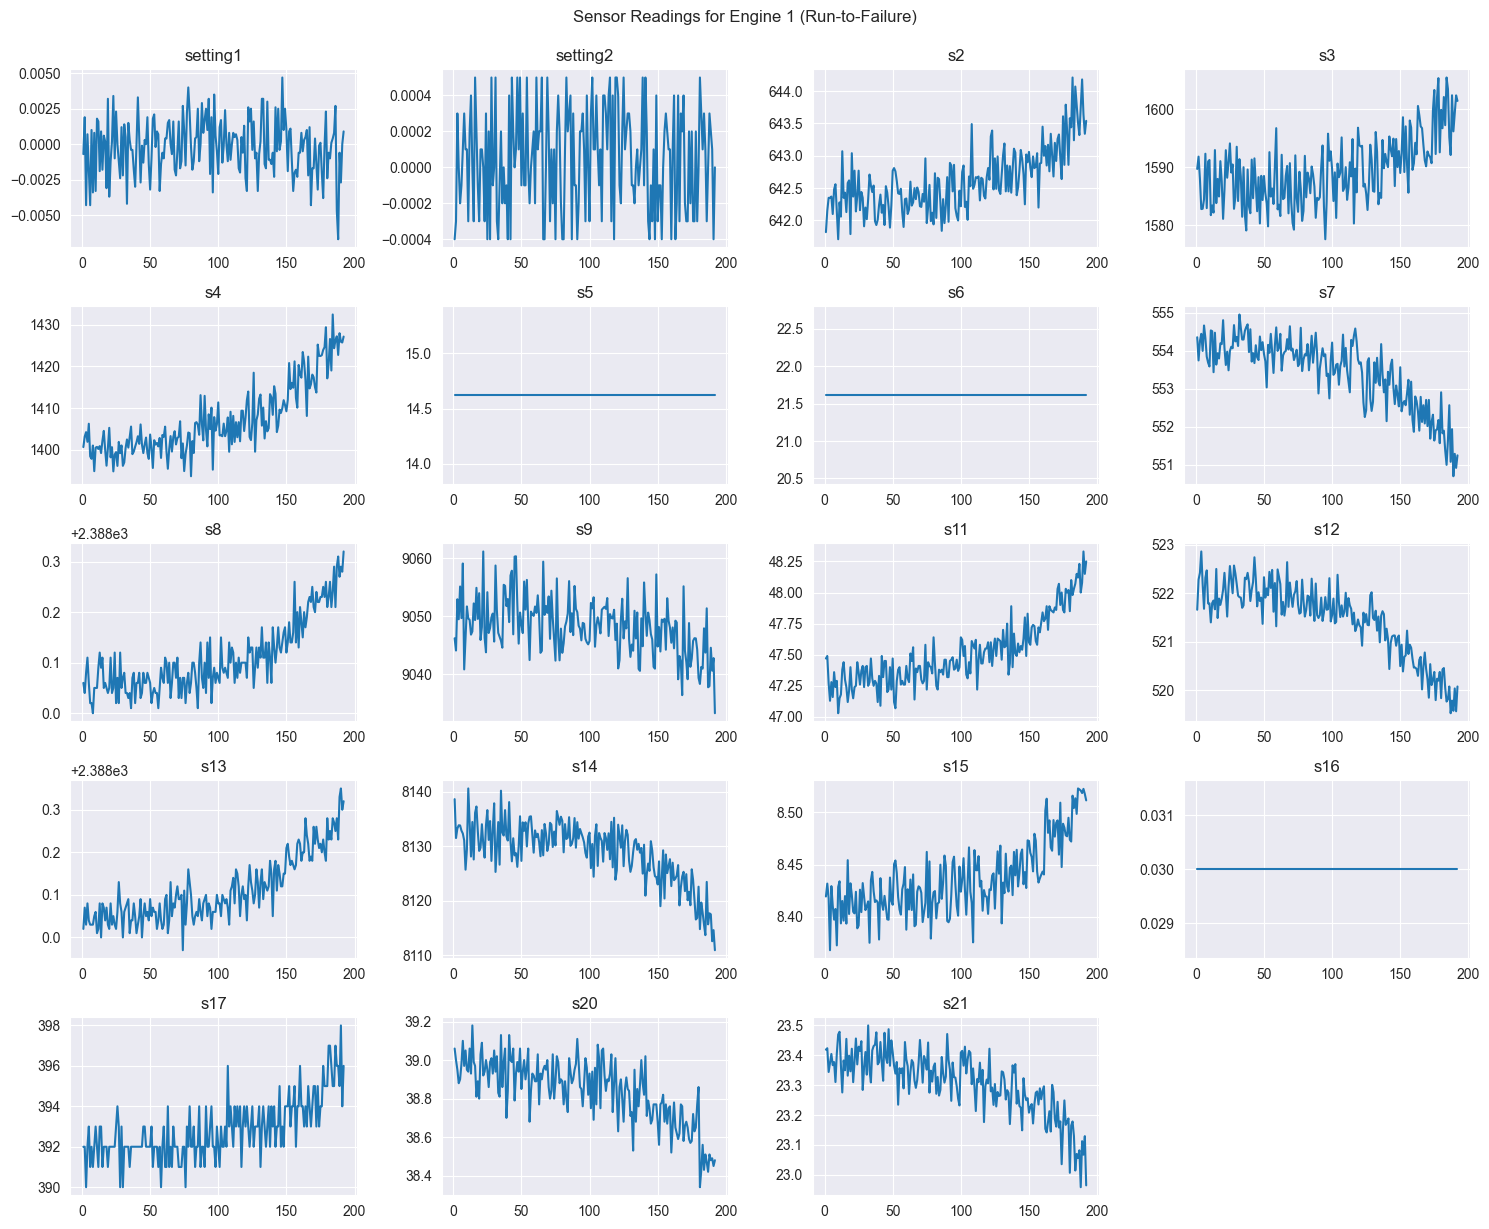

In [12]:
# Get remaining sensors
remaining_sensors = [col for col in train_df.columns if col.startswith('s')]

# Get all data for just the first engine
engine_1_data = train_df[train_df['engine_id'] == 1]

# Create a 4x4 grid of plots
plt.figure(figsize=(15, 12))


for i, sensor in enumerate(remaining_sensors):
    plt.subplot(5, 4, i + 1) # (5 rows, 4 columns, plot number i+1)
    
    # Plot the engine's 'cycle' (x-axis) vs. the sensor's value (y-axis)
    plt.plot(engine_1_data['cycle'], engine_1_data[sensor])
    
    # Add the sensor name as the title for the small plot
    plt.title(sensor)
    plt.tight_layout()

plt.suptitle('Sensor Readings for Engine 1 (Run-to-Failure)', y=1.02)
plt.show()

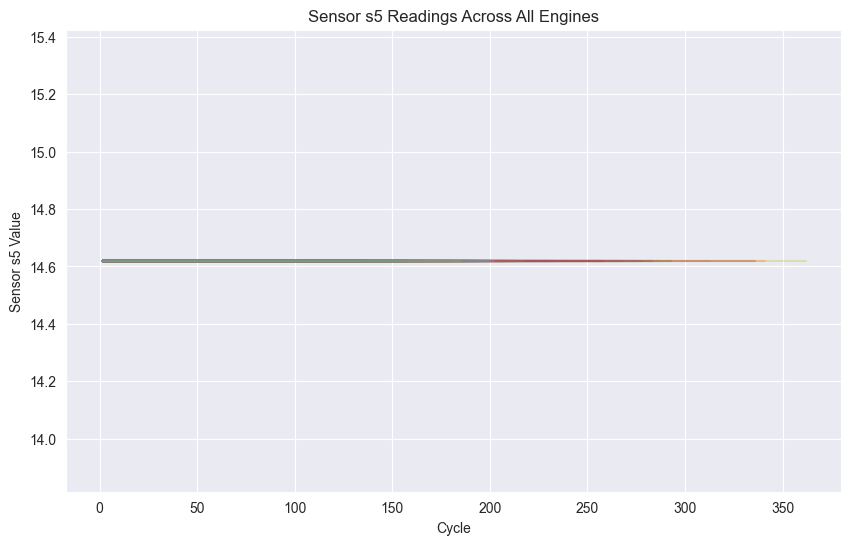

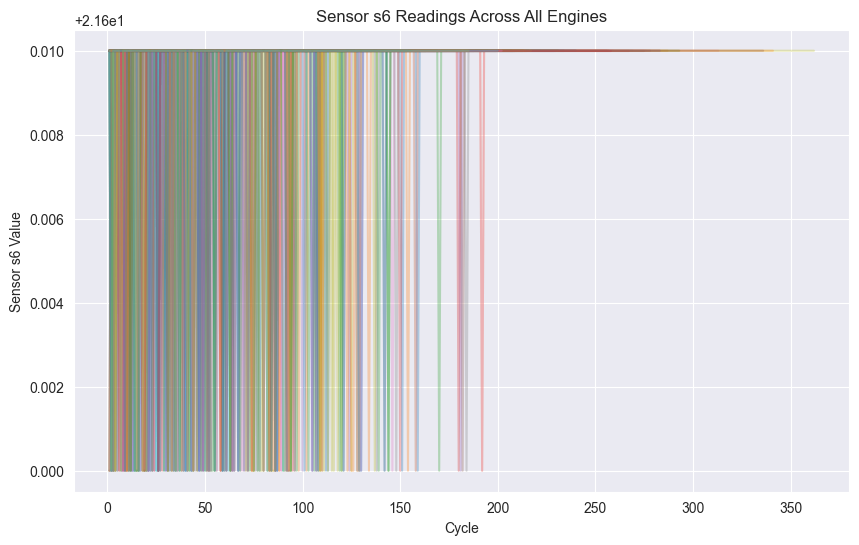

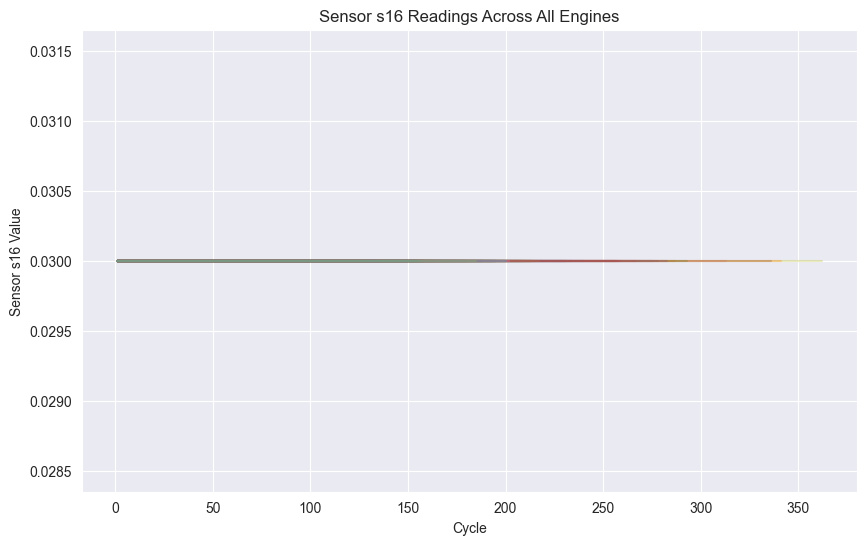

In [13]:
#A few non-zero variance sensors are still looking a little insignificant
#Check s5, s6, and s16 for other engines
sensors_to_check = ['s5', 's6', 's16']
for sensor in sensors_to_check:
    plt.figure(figsize=(10, 6))
    for engine_id in train_df['engine_id'].unique():
        engine_data = train_df[train_df['engine_id'] == engine_id]
        plt.plot(engine_data['cycle'], engine_data[sensor], alpha=0.3)
    
    plt.title(f'Sensor {sensor} Readings Across All Engines')
    plt.xlabel('Cycle')
    plt.ylabel(f'Sensor {sensor} Value')
    plt.show()

In [14]:
#They can also be removed
train_df.drop(columns=sensors_to_check, inplace=True)

In [15]:
train_df.head()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [16]:
#Now add the RUL column to the dataset
max_cycles = train_df.groupby('engine_id')['cycle'].transform('max')
train_df['RUL'] = max_cycles - train_df['cycle']
train_df.head()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [17]:
train_df.tail()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1
20630,100,200,-0.0032,-0.0005,643.85,1600.38,1432.14,550.79,2388.26,9061.48,48.20,519.30,2388.26,8137.33,8.5036,396,38.37,23.0522,0


In [18]:
#High RUL values dont help predict failures, so cap them at 200 based off the max lifetimes
Clipping_value = 200
train_df['RUL'] = train_df['RUL'].clip(upper=Clipping_value)
train_df.head()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [19]:
from sklearn.preprocessing import StandardScaler

#Scale settings and sensor data
scaler = StandardScaler()
feature_cols = [col for col in train_df.columns if col.startswith('s')]
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])

In [20]:
train_df.head()

,engine_id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,RUL
0,1,1,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427,191
1,1,2,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922,190
2,1,3,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423,189
3,1,4,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792,188
4,1,5,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552,187


In [21]:
#Baseline Model using only the last cycle's data for each engine
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the training data for the baseline model
x_train_baseline = train_df.groupby('engine_id').last()[feature_cols]
y_train_baseline = train_df.groupby('engine_id').last()['RUL']

# Train the baseline model
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
baseline_model.fit(x_train_baseline, y_train_baseline)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
#Set up test data
#Load test data
test_df = pd.read_csv('CMAPPS Data/test_FD001.txt', sep=' ', header=None, names=column_names)
test_df.head()

#Load true RUL values for test data
true_rul = pd.read_csv('CMAPPS Data/RUL_FD001.txt', header=None, names=['RUL'])

#Prepare test data
test_df.drop(columns=['s22', 's23'] + drop_cols + sensors_to_check, inplace=True)

x_test_baseline = test_df.groupby('engine_id').last()[feature_cols]
y_test_baseline = true_rul['RUL']
x_test_baseline[feature_cols] = scaler.transform(x_test_baseline[feature_cols])

x_test_baseline.head()


,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
engine_id,,,,,,,,,,,,,,,,
1,-0.270260,1.356910,-0.201850,-1.517390,-1.113706,1.188932,-0.234584,-0.400453,-1.165071,0.510525,-0.502695,-0.715188,-1.059765,-0.136018,-0.034694,0.605041
2,0.827003,-0.349255,-0.261846,-0.641513,0.210682,0.172064,0.047171,-0.927118,0.482370,0.442731,-0.085548,-0.883465,0.222760,-1.427402,-0.034694,-0.257790
3,-0.727453,1.356910,0.398100,-0.126100,1.106199,-0.878699,0.892435,-0.723788,1.268649,-0.791108,0.609696,-0.644417,-0.806460,1.155367,0.629236,-0.145087
4,0.552687,1.356910,0.198117,0.653544,-0.228188,-0.822207,0.469803,-0.631407,0.407486,0.632553,0.192549,-0.530136,0.566722,1.155367,-1.307226,-0.291971
5,-0.590295,-1.372953,-0.821799,-0.095110,1.158419,-0.087802,0.047171,-0.509590,-0.303908,-0.560610,0.748745,-0.944275,-0.158531,0.509675,-0.366659,1.126989


In [23]:
#Evaluate the baseline model
baseline_predictions = baseline_model.predict(x_test_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test_baseline, baseline_predictions))
print(f'Baseline Model RMSE: {rmse_baseline:.2f}')

Baseline Model RMSE: 86.20


In [24]:
#Create a sliding window dataset for better learning
def windowed_dataset(df, feature_cols, target_cols, window_size):

    X, y = [], []  #set up empty lists to hold features and targets
    for engine_id in df['engine_id'].unique():
        engine_data = df[df['engine_id'] == engine_id]  #Get data for the current engine

        for i in range(len(engine_data) - window_size + 1):  #Create sliding windows
            X.append(engine_data[feature_cols].iloc[i:i+window_size].values)  #Get feature data from i to i+window_size
            y.append(engine_data[target_cols].iloc[i+window_size-1])  #Target is the RUL at the end of the window

    return np.array(X), np.array(y)


In [25]:
Window_Size = 30
X_train_windowed, y_train_windowed = windowed_dataset(train_df, feature_cols, 'RUL', Window_Size)

print(f"Training data shapes:")
print(f"X_train (features): {X_train_windowed.shape}")
print(f"y_train (target):   {y_train_windowed.shape}")

Training data shapes:
X_train (features): (17731, 30, 16)
y_train (target):   (17731,)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


#Get input shape
input_shape = (X_train_windowed.shape[1], X_train_windowed.shape[2])  # (window_size, num_features)
print(f"Input shape for LSTM: {input_shape}")

Input shape for LSTM: (30, 16)


In [27]:
#Build LSTM model
#Define architecture
lstm_model = Sequential()
lstm_model.add(LSTM(
    64, #number of LSTM units(neurons)
    return_sequences=True,  #return the full sequence since we are stacking layers
    input_shape=input_shape))
lstm_model.add(Dropout(0.2))  #dropout for regularization
lstm_model.add(LSTM(32, return_sequences=False))  #second LSTM layer
lstm_model.add(Dropout(0.2))  #dropout for regularization
lstm_model.add(Dense(1, activation='relu')) #output layer
lstm_model.compile(optimizer='adam', loss='mse') #compile the model
lstm_model.summary()

d:\ML Solo\NASA Turbofan Predictive Maintenance\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,185 (129.63 KB)

 Trainable params: 33,185 (129.63 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  #monitor validation loss
    patience=15,        #stop after 15 epochs of no improvement
    restore_best_weights=True  #restore model weights from the epoch with the best value of the monitored quantity
)

In [29]:
#Train the LSTM model
train_history = lstm_model.fit(
    X_train_windowed, 
    y_train_windowed, 
    epochs=100, #Run for 100 epochs
    batch_size=64, #Process data in batches of 64
    validation_split=0.2,  #Use 20% of training data for validation
    callbacks=[early_stopping],  #Use early stopping
    verbose=1, #Print progress logs
    shuffle=True  #Shuffle data each epoch
)

Epoch 1/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 9372.7871 - val_loss: 11354.4170
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 9372.7871 - val_loss: 11354.4170
Epoch 2/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8122.7632 - val_loss: 10189.7080
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8122.7632 - val_loss: 10189.7080
Epoch 3/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 7184.6880 - val_loss: 9167.9180
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 7184.6880 - val_loss: 9167.9180
Epoch 4/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 6376.6943 - val_loss: 8262.1475
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 6376.6943 - val_loss: 8262.1475
Epoch 5/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5654.4536 - val_loss: 7452.2725
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5654.4536 - val_loss: 7452.2725
Epoch 6/100
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - 

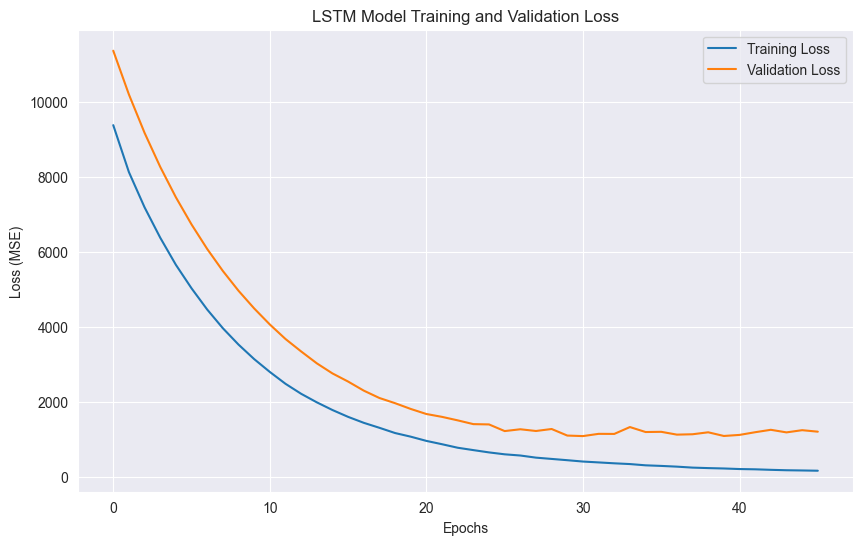

In [30]:
#Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [31]:
#Prepare test data for LSTM model
test_df[feature_cols] = scaler.transform(test_df[feature_cols])

#Create windowed test dataset of only the last 30 cycles for each engine
X_test_windowed = []
for engine_id in test_df['engine_id'].unique():
    engine_data = test_df[test_df['engine_id'] == engine_id]
    #Only take the last window_size cycles
    if len(engine_data) >= Window_Size:
        X_test_windowed.append(engine_data[feature_cols].iloc[-Window_Size:].values)
    else:
        #If there are less than window_size cycles, pad with zeros at the beginning
        padding = np.zeros((Window_Size - len(engine_data), len(feature_cols)))
        padded_data = np.vstack((padding, engine_data[feature_cols].values))
        X_test_windowed.append(padded_data)

X_test_windowed = np.array(X_test_windowed)
y_test = y_test_baseline  #same answer keys as before

print(f"LSTM Test data shapes: X={X_test_windowed.shape}, y={y_test.shape}")

LSTM Test data shapes: X=(100, 30, 16), y=(100,)



In [32]:
#Model evaluation

lstm_predictions = lstm_model.predict(X_test_windowed)
lstm_predictions = lstm_predictions.flatten()  #Flatten to 1D array from (100,1)

rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
print(f'LSTM Model RMSE: {rmse_lstm:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
LSTM Model RMSE: 21.06
LSTM Model RMSE: 21.06


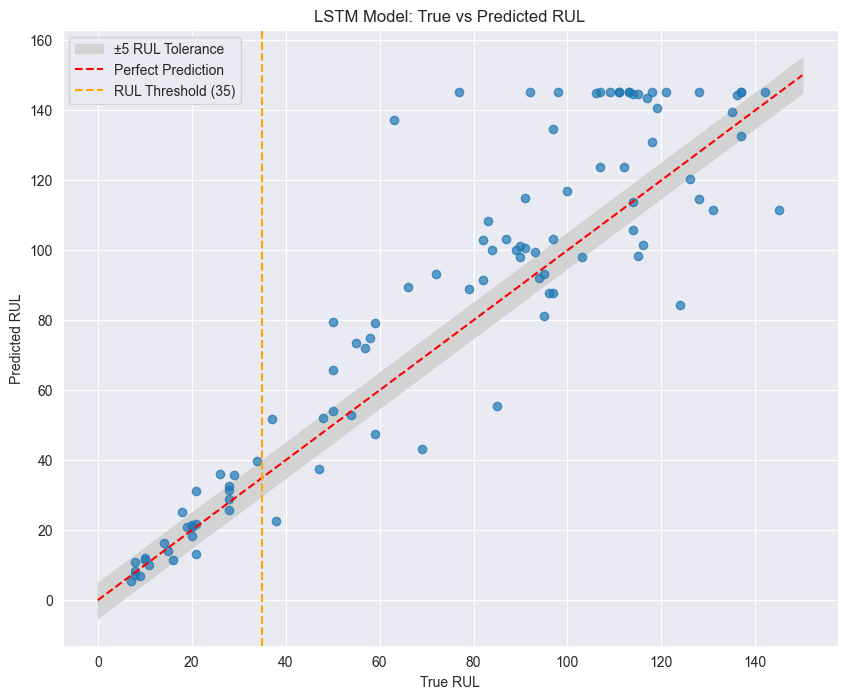

In [33]:
Error_Tolerance = 5
x_line = np.array([0, 150])
upper_bound = x_line + Error_Tolerance
lower_bound = x_line - Error_Tolerance
RUL_Threshold = 35

#Scatter plot of true vs predicted RUL for LSTM model
plt.figure(figsize=(10, 8))
plt.fill_between(x_line, lower_bound, upper_bound, color='lightgray', label='±5 RUL Tolerance')  #shade area within error tolerance
plt.scatter(y_test, lstm_predictions, alpha=0.7)  #scatter plot of true vs predicted RUL
plt.title('LSTM Model: True vs Predicted RUL') 
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.plot([0, 150], [0, 150], 'r--', label='Perfect Prediction')  #line for perfect predictions
plt.axvline(x=RUL_Threshold, color='orange', linestyle='--', label='RUL Threshold (35)')  #vertical line at RUL threshold
plt.legend()
plt.show()


In [34]:
#See if a larger window size helps with larger RUL predictions
Window_Size_Large = 50
X_train_windowed_large, y_train_windowed_large = windowed_dataset(train_df, feature_cols, 'RUL', Window_Size_Large)
print(f"Training data shapes:")
print(f"X_train (features): {X_train_windowed_large.shape}")
print(f"y_train (target):   {y_train_windowed_large.shape}")

Training data shapes:
X_train (features): (15731, 50, 16)
y_train (target):   (15731,)


In [35]:
#Build LSTM model
#Define architecture
lstm_model_large = Sequential()
lstm_model_large.add(LSTM(
    64, #number of LSTM units(neurons)
    return_sequences=True,  #return the full sequence since we are stacking layers
    input_shape=(X_train_windowed_large.shape[1], X_train_windowed_large.shape[2])))
lstm_model_large.add(Dropout(0.2))  #dropout for regularization
lstm_model_large.add(LSTM(32, return_sequences=False))  #second LSTM
lstm_model_large.add(Dropout(0.2))  #dropout for regularization
lstm_model_large.add(Dense(1, activation='relu')) #output layer
lstm_model_large.compile(optimizer='adam', loss='mse') #compile the model
lstm_model_large.summary()

#Set up early stopping for larger window size model
early_stopping_l = EarlyStopping(
    monitor='val_loss',  #monitor validation loss
    patience=15,        #stop after 20 epochs of no improvement
    restore_best_weights=True  #restore model weights from the epoch with the best value of the monitored quantity
)


d:\ML Solo\NASA Turbofan Predictive Maintenance\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,185 (129.63 KB)

 Trainable params: 33,185 (129.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_large = lstm_model_large.fit(
    X_train_windowed_large, 
    y_train_windowed_large, 
    epochs=100, #Run for 100 epochs
    batch_size=64, #Process data in batches of 64
    validation_split=0.2,  #Use 20% of training data for validation
    callbacks=[early_stopping_l],  #Use early stopping
    verbose=1, #Print progress logs
    shuffle=True  #Shuffle data each epoch
)

Epoch 1/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 7850.6455 - val_loss: 10270.1992
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 7850.6455 - val_loss: 10270.1992
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6792.7197 - val_loss: 9272.7461
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6792.7197 - val_loss: 9272.7461
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6050.5386 - val_loss: 8425.7529
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 6050.5386 - val_loss: 8425.7529
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5395.3247 - val_loss: 7622.8955
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 5395.3247 - val_loss: 7622.8955
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4773.9595 - val_loss: 6885.3354
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4773.9595 - val_loss: 6885.3354
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4220.03

In [37]:
#Prepare test data for larger window size
X_test_windowed_large = []
for engine_id in test_df['engine_id'].unique():
    engine_data = test_df[test_df['engine_id'] == engine_id]
    #Only take the last window_size cycles
    if len(engine_data) >= Window_Size_Large:
        X_test_windowed_large.append(engine_data[feature_cols].iloc[-Window_Size_Large:].values)
    else:
        #If there are less than window_size cycles, pad with zeros at the beginning
        padding = np.zeros((Window_Size_Large - len(engine_data), len(feature_cols)))
        padded_data = np.vstack((padding, engine_data[feature_cols].values))
        X_test_windowed_large.append(padded_data)

X_test_windowed_large = np.array(X_test_windowed_large)


In [38]:
#Evaluate larger window size LSTM model
lstm_predictions_large = lstm_model_large.predict(X_test_windowed_large)
lstm_predictions_large = lstm_predictions_large.flatten()  #Flatten to 1D array from (100,1)
rmse_lstm_large = np.sqrt(mean_squared_error(y_test, lstm_predictions_large))
print(f'LSTM Model RMSE: {rmse_lstm_large:.2f}')
diff_rmse = rmse_lstm - rmse_lstm_large
print(f'RMSE Improvement with Larger Window Size: {diff_rmse:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
LSTM Model RMSE: 21.99
RMSE Improvement with Larger Window Size: -0.93
LSTM Model RMSE: 21.99
RMSE Improvement with Larger Window Size: -0.93


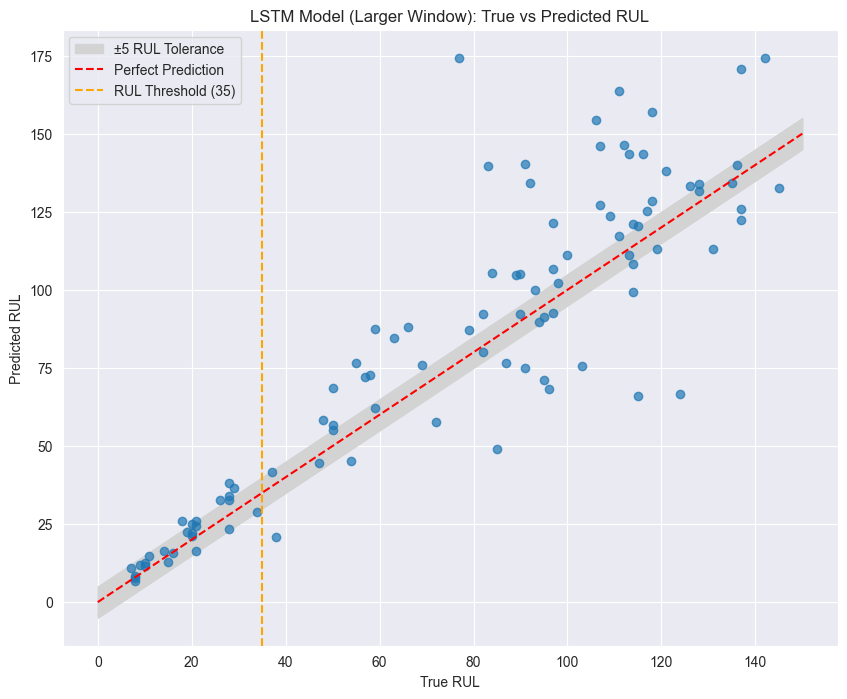

In [39]:
#Plot comparison of true vs predicted RUL for larger window size LSTM model
plt.figure(figsize=(10, 8))
plt.fill_between(x_line, lower_bound, upper_bound, color='lightgray', label='±5 RUL Tolerance')  #shade area within error tolerance
plt.scatter(y_test, lstm_predictions_large, alpha=0.7)  #scatter plot of true vs predicted RUL
plt.title('LSTM Model (Larger Window): True vs Predicted RUL')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.plot([0, 150], [0, 150], 'r--', label='Perfect Prediction')  #line for perfect predictions
plt.axvline(x=RUL_Threshold, color='orange', linestyle='--', label='RUL Threshold (35)')  #vertical line at RUL threshold
plt.legend()
plt.show()